In [1]:
from pandas import Series,DataFrame
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import statistics
from scipy import stats

In [2]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures 

In [3]:
from statsmodels.formula.api import ols

In [4]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
import statsmodels.api as sm

In [5]:
df=pd.read_csv("Islander_data.csv")

In [6]:
df.head(5)

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1


In [13]:
#here we are trying to test if any of the drug has significant effect

In [54]:
lm=ols(" Diff ~ Drug",data=df).fit()
table=sm.stats.anova_lm(lm)
print(table)

             df        sum_sq      mean_sq          F        PR(>F)
Drug        2.0   4304.785154  2152.392577  22.711289  1.359214e-09
Residual  195.0  18480.525755    94.771927        NaN           NaN


In [14]:
#p value is less than .05 so null hypothesis will be rejected

In [11]:
h1=[];h2=[];h3=[];
for i in np.arange(len(df["Drug"])):
    if df["Drug"][i]=="A":
        h1=np.append(h1,df["Diff"][i])
    elif df["Drug"][i]=="S":
        h2=np.append(h2,df["Diff"][i])
    elif df["Drug"][i]=="T":
        h3=np.append(h3,df["Diff"][i])

In [12]:
stats.ttest_ind(h1,h2,equal_var=False)   #ignore

Ttest_indResult(statistic=5.172664761353283, pvalue=1.1172395726869783e-06)

In [19]:
stats.ttest_ind(h1,h2,equal_var=False)   #ignore

Ttest_indResult(statistic=5.172664761353283, pvalue=1.1172395726869783e-06)

In [20]:
stats.ttest_ind(h1,h3,equal_var=False)   #ignor

Ttest_indResult(statistic=5.45590061042246, pvalue=3.443613854017417e-07)

In [24]:
stats.ttest_ind(h2,h3,equal_var=False)  #ignor

Ttest_indResult(statistic=0.32633442656774586, pvalue=0.7447009669143168)

In [ ]:
#here we are tryinb to check if threr is any significant difference due to drug

In [30]:
stats.ttest_ind(df["Mem_Score_Before"].values,df["Mem_Score_After"].values,equal_var=False)

Ttest_indResult(statistic=-1.7301491898886299, pvalue=0.08440181792358983)

In [34]:
df["Dosage"].unique()

array([1, 2, 3], dtype=int64)

In [48]:
d=[sum((pd.get_dummies(df["Dosage"]))[1]),sum((pd.get_dummies(df["Dosage"]))[2]),sum((pd.get_dummies(df["Dosage"]))[3])]

([<matplotlib.patches.Wedge at 0x1e668333b00>,
 [Text(0.904326004466885, 1.625359799442868, 'dose1'),
  Text(-1.8590635724604339, -0.059013842025839175, 'dose2'),
  Text(0.9554399241787885, -1.5958491630743903, 'dose3')],
 [Text(0.5153685831908054, 0.9262803158115267, '33.8%'),
  Text(-1.0594663369935804, -0.033631544380316944, '33.3%'),
  Text(0.5444980213061912, -0.9094624262682007, '32.8%')])

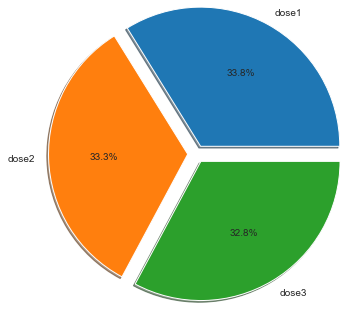

In [51]:
plt.pie(d,labels=["dose1","dose2","dose3"],radius=1.6,shadow=True,explode=[.1,.1,.1],autopct='%1.1f%%')

In [63]:
h=0
s=0
for i in np.arange(len(df["Happy_Sad_group"])):
    if df["Happy_Sad_group"][i]=="H":
        h=h+1
    else:
        s=s+1
m=[h,s]
ms=Series(m,["happy","sad"])
ms

happy    99
sad      99
dtype: int64

In [56]:
d1=[sum((pd.get_dummies(df["Drug"]))["A"]),sum((pd.get_dummies(df["Drug"]))["S"]),sum((pd.get_dummies(df["Drug"]))["T"])]

([<matplotlib.patches.Wedge at 0x1e66a5592e8>,
 [Text(0.8557063268073751, 1.5379748639889503, 'Drug_A'),
  Text(-1.7591139180270772, -0.055841054820148894, 'Drug_S'),
  Text(0.9040721863197139, -1.5100508209736165, 'Drug_T')],
 [Text(0.46674890553129544, 0.8388953803576091, '33.8%'),
  Text(-0.9595166825602237, -0.030458757174626667, '33.3%'),
  Text(0.49313028344711657, -0.8236640841674271, '32.8%')])

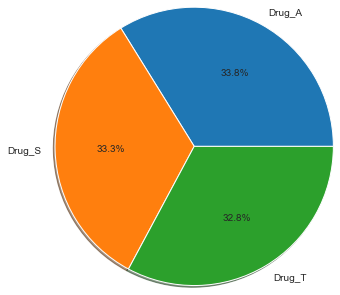

In [58]:
plt.pie(d1,labels=["Drug_A","Drug_S","Drug_T"],radius=1.6,shadow=True,autopct='%1.1f%%')

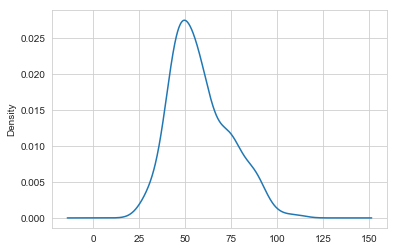

In [53]:
df["Mem_Score_Before"].plot(kind="kde")

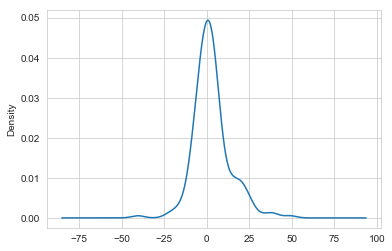

In [54]:
df["Diff"].plot(kind="kde")

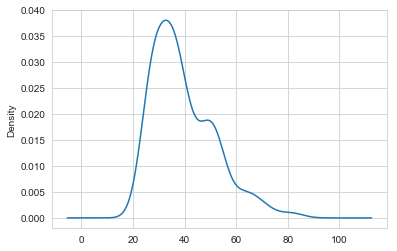

In [65]:
df["age"].plot(kind="kde")

In [69]:
(np.corrcoef(df["age"].values,df["Diff"].values))[0,1]

-0.009293328126756118

In [70]:
(np.corrcoef(df["Mem_Score_After"].values,df["Mem_Score_Before"].values))[0,1]

0.8075281614905367

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


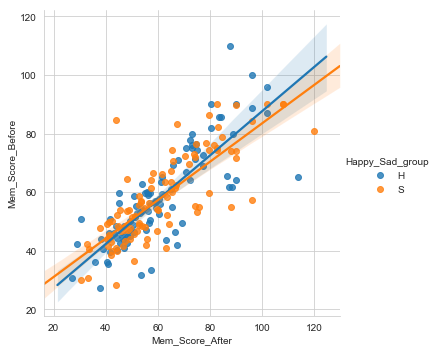

In [82]:
sns.lmplot("Mem_Score_After","Mem_Score_Before",df,hue="Happy_Sad_group")

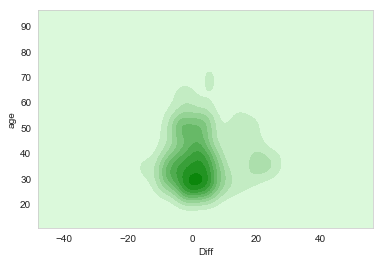

In [83]:
sns.kdeplot(df["Diff"],df["age"],shade=True,color="green")

In [ ]:
#question:is any drug effective in Sad group?

In [63]:
sd_a=[]
sd_s=[]
sd_t=[]
for i in np.arange(len(df["Diff"])):
    if df["Happy_Sad_group"][i]=="S":
        if df["Drug"][i]=="A":
            sd_a=np.append(sd_a,df["Diff"][i])
        elif df["Drug"][i]=="S":
            sd_s=np.append(sd_s,df["Diff"][i])
        elif df["Drug"][i]=="T":
            sd_t=np.append(sd_t,df["Diff"][i])

In [64]:
stats.f_oneway(sd_a,sd_s,sd_t)

F_onewayResult(statistic=14.269210167203454, pvalue=3.7536887045009766e-06)

In [66]:
#question : is any age group performing better for this kind od drug

In [72]:
a1=[];a2=[];a3=[];
for i in np.arange(len(df["age"])):
    if df["age"][i]<30:
        a1=np.append(a1,df["Diff"][i])
    elif df["age"][i]>50:
        a3=np.append(a3,df["Diff"][i])
    else:
        a2=np.append(a2,df["Diff"][i])

In [73]:
stats.f_oneway(a1,a2,a3)

F_onewayResult(statistic=0.04529299472916988, pvalue=0.9557274719988357)

In [74]:
stats.ttest_ind(a1,a2,equal_var=False) 

Ttest_indResult(statistic=-0.3470465763370495, pvalue=0.729100263333444)

In [75]:
stats.ttest_ind(a1,a3,equal_var=False)   

Ttest_indResult(statistic=-0.1482026238655618, pvalue=0.8826369472839611)

In [76]:
stats.ttest_ind(a3,a2,equal_var=False)   

Ttest_indResult(statistic=-0.11914450588708678, pvalue=0.9054986665601117)

In [ ]:
#this means all the three gropus are shwoing different reaction to the drug

In [81]:
[np.mean(a1),np.mean(a2),np.mean(a3)]

[2.5857142857142854, 3.138738738738739, 2.892105263157895]

In [82]:
#question:is the memory of hsppy people better than the one who are sad

In [83]:
h_m=[]
s_m=[]
for i in np.arange(len(df["Diff"])):
    if df["Happy_Sad_group"][i]=="S":
        s_m=np.append(s_m,df["Mem_Score_Before"][i])
    else:
        h_m=np.append(h_m,df["Mem_Score_Before"][i])

In [84]:
stats.ttest_ind(h_m,s_m,equal_var=False)   

Ttest_indResult(statistic=-0.11060869772005939, pvalue=0.9120402469410058)

In [87]:
mem=[np.mean(h_m),np.mean(s_m)]
mem

[57.84343434343435, 58.091919191919196]

In [88]:
Series(mem,["happy","sad"])

happy    57.843434
sad      58.091919
dtype: float64